## EDA

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
sample_submission = pd.read_csv("sample_submission_8RXa3c6.csv")
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [55]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [56]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv('test_AbJTz2l.csv')

In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
train.shape

(8523, 12)

In [62]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [102]:
train['source'] ='train'
test['source'] = 'test'

In [103]:
df = pd.concat([train,test])

In [104]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [105]:
numerical_columns = df.select_dtypes(include = np.number).drop(columns = ['Outlet_Establishment_Year','Item_Outlet_Sales']).columns
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [106]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [107]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [108]:
df[categorical_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [109]:
df.shape

(14204, 13)

In [110]:
df[categorical_columns].apply(lambda x: print(x.value_counts()))

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [111]:
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x: x[0:3])
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [112]:
df['Item_Identifier_3'].value_counts()

FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [113]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FDA,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DRC,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FDN,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC


In [114]:
df['Item_Identifier_2'].value_counts()


FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [115]:
df.groupby(by = ['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [116]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FDA,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DRC,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FDN,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC


In [117]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat",'reg':"Regular","low fat":"Low Fat",'Low fat':"Low Fat"})

In [118]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [119]:
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [120]:
train.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [121]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [122]:
df[numerical_columns]

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614
...,...,...,...
5676,10.50,0.013496,141.3154
5677,7.60,0.142991,169.1448
5678,10.00,0.073529,118.7440
5679,15.30,0.000000,214.6218


In [123]:
df[numerical_columns].isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

In [124]:
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [125]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [126]:
df['Item_Weight'] = df.groupby('Item_Type').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [127]:
df[numerical_columns].isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

In [128]:
df.loc[df['Item_Visibility'] == 0.000000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,FDP,FD
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train,FDY,FD
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train,FDP,FD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,13.194406,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test,FDQ,FD
5648,FDK26,12.340830,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,FDK,FD
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test,FDQ,FD
5661,DRG37,11.788408,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DRG,DR


In [129]:
train = df.loc[df['source']=='train']
test = df.loc[df['source'] == 'test']

<AxesSubplot:>

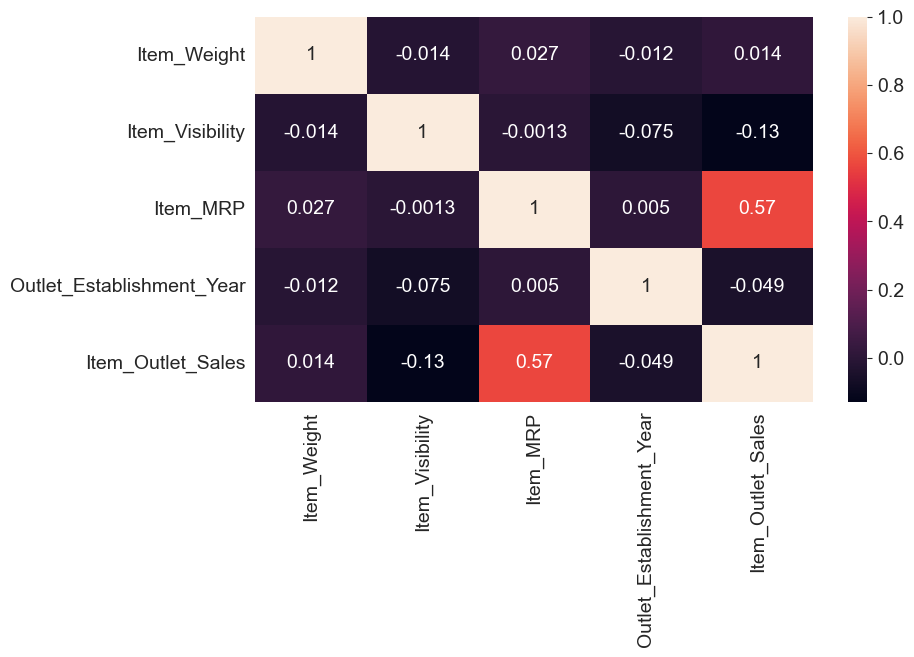

In [87]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [88]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [89]:
df['Age_outlets'] = 2013 - df['Outlet_Establishment_Year']

In [90]:
df['Age_outlets'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Age_outlets, dtype: int64

In [97]:
df.drop(columns = ['Outlet_Establishment_Year','Item_Identifier_3','Item_Identifier'],inplace = True)


KeyError: "['Outlet_Establishment_Year', 'Item_Identifier_3', 'Item_Identifier'] not found in axis"

In [92]:
X = train.select_dtypes(include = np.number).drop(columns = 'Item_Outlet_Sales')
vif_df = pd.DataFrame()
vif_df['features'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

MissingDataError: exog contains inf or nans

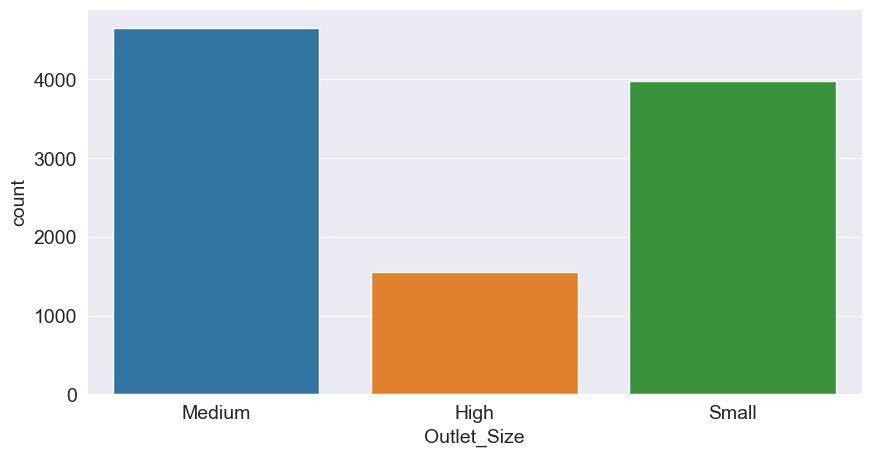

In [93]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,5))
sns.countplot(df.Outlet_Size);

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

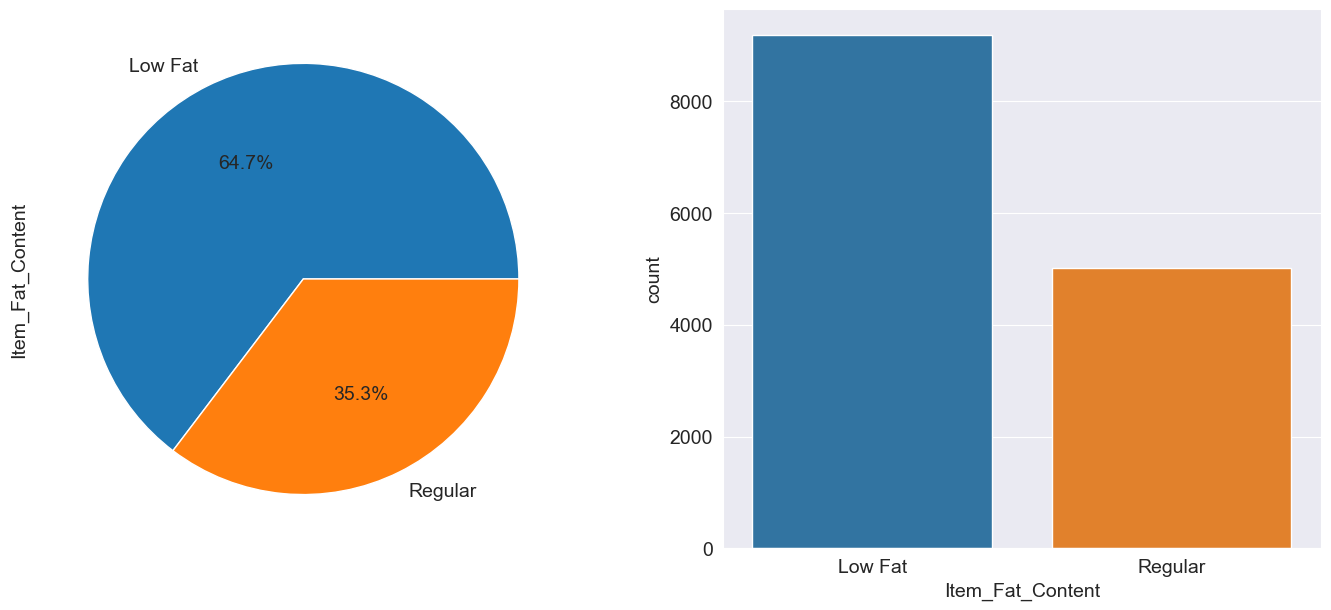

In [94]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

In [130]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train[['Item_Identifier_2','Item_Fat_Content']])

OneHotEncoder(handle_unknown='ignore')

In [131]:
encoded_mat = enc.transform(train[['Item_Identifier_2','Item_Fat_Content']]) #This is tranforming 

In [132]:
encoded_columns = enc.fit_transform(train[['Item_Identifier_2','Item_Fat_Content']])

In [133]:
enc.transform(test[['Item_Identifier_2','Item_Fat_Content']]).toarray()

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [134]:
df[['Item_Identifier_2','Item_Fat_Content']]

,Item_Identifier_2,Item_Fat_Content
0,FD,Low Fat
1,DR,Regular
2,FD,Low Fat
3,FD,Regular
4,NC,Low Fat
...,...,...
5676,FD,Regular
5677,FD,Regular
5678,NC,Low Fat
5679,FD,Regular


In [135]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FDA,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DRC,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FDN,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,FDX,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NCD,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,FDB,FD
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,FDD,FD
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,NCO,NC
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,FDJ,FD


In [136]:
encoded_columns.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [137]:
numerical_columns = df.select_dtypes(include = np.number).drop(columns = ['Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude = np.number)

In [138]:
categorical_columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Identifier_3,Item_Identifier_2
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train,FDA,FD
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train,DRC,DR
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train,FDN,FD
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train,FDX,FD
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train,NCD,NC
...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test,FDB,FD
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test,FDD,FD
5678,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,test,NCO,NC
5679,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,test,FDJ,FD


In [140]:
df_categories_encoded = pd.get_dummies(categorical_columns)

In [141]:
df_categories_encoded

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [142]:
df_final = pd.concat([numerical_columns,df_categories_encoded ,df['source']],axis = 1)

In [143]:
df_categories_encoded

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [144]:
df_final.to_excel("Pre_processed_Data.xlsx",index = False)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
import pandas as pd
import numpy as np

In [148]:
data_processed = pd.read_excel("Pre_processed_Data.xlsx")

In [149]:
data_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,source
0,9.30,0.016047,249.8092,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,train
1,5.92,0.019278,48.2692,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,train
2,17.50,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,train
3,19.20,0.000000,182.0950,1998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,train
4,8.93,0.000000,53.8614,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,test
14200,7.60,0.142991,169.1448,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,test
14201,10.00,0.073529,118.7440,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
14202,15.30,0.000000,214.6218,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,test


In [150]:
data_processed_train  = data_processed.loc[data_processed['source'] =='train']
data_processed_test  = data_processed.loc[data_processed['source'] =='test']

In [151]:
data_processed_train.drop(columns = ['source'],inplace = True)

In [152]:
del data_processed_test['source']